In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv("telecom.csv")

In [3]:
df = df.drop(columns=[
    'customerID',
    'gender',
    'PhoneService',
    'MultipleLines'
])


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# remove rows with missing TotalCharges
df.dropna(inplace=True)

# remove tenure = 0 (CRITICAL)
df = df[df['tenure'] > 0]


In [5]:
df['AvgChargePerMonth'] = df['TotalCharges'] / df['tenure']


In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [7]:
df_encoded.isnull().sum().sum()


np.int64(0)

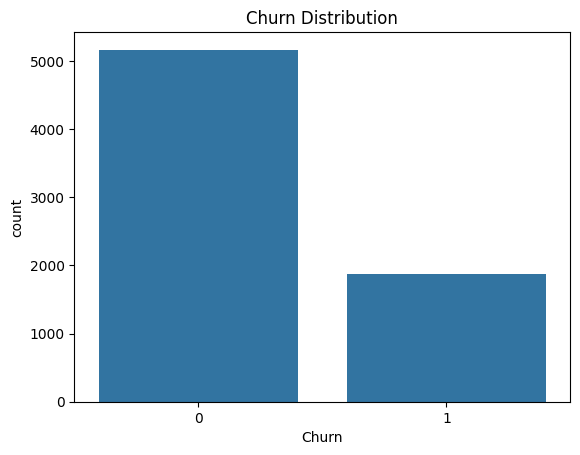

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

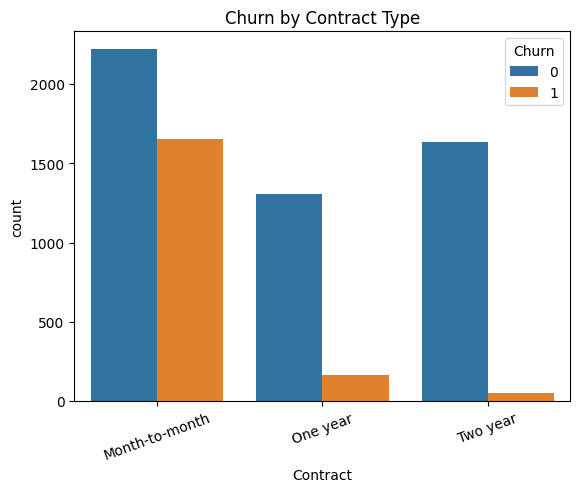

In [9]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=20)
plt.title("Churn by Contract Type")
plt.show()


In [10]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


c:\Users\dellll\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7960199004975125


[[917 116]
 [171 203]]


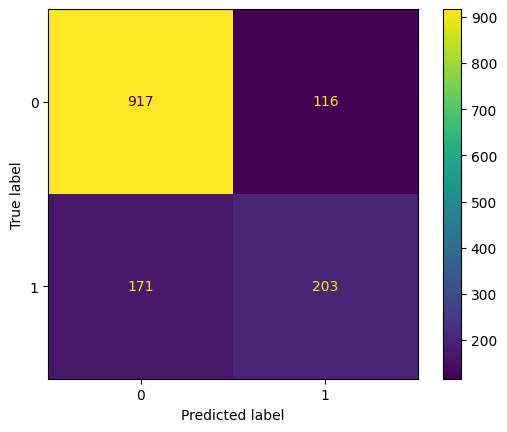

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)

ConfusionMatrixDisplay(cm).plot()


In [18]:
df['Churn_Probability'] = model.predict_proba(X)[:, 1]

In [19]:
results = X_test.copy()
results['Actual_Churn'] = y_test.values
results['Predicted_Churn'] = y_pred
results['Churn_Probability'] = y_prob

results.head(10)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AvgChargePerMonth,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Actual_Churn,Predicted_Churn,Churn_Probability
974,0,59,75.95,4542.35,76.988983,True,True,False,False,False,...,True,False,True,True,True,False,False,0,0,0.025388
619,0,7,78.55,522.95,74.707143,False,False,True,False,False,...,False,False,False,True,False,False,False,0,1,0.521497
4289,0,54,20.10,1079.45,19.989815,False,False,False,True,True,...,False,False,True,False,False,False,True,0,0,0.005660
3721,0,2,20.65,38.70,19.350000,False,False,False,True,True,...,False,False,False,False,False,False,True,1,0,0.199450
4533,0,71,105.15,7555.00,106.408451,True,False,True,False,False,...,True,False,True,True,False,False,False,0,0,0.102302
445,0,60,105.90,6396.45,106.607500,False,False,True,False,False,...,True,False,False,True,False,True,False,1,0,0.468515
5898,0,33,24.15,800.30,24.251515,True,True,False,True,True,...,False,True,False,False,True,False,False,0,0,0.020655
3387,0,7,20.65,155.90,22.271429,False,False,False,True,True,...,False,False,False,False,False,False,True,0,0,0.168050
1346,0,14,87.25,1258.60,89.900000,True,True,True,False,False,...,True,False,False,True,False,True,False,1,1,0.642504
5690,0,72,61.20,4390.25,60.975694,False,False,False,False,False,...,True,False,True,True,True,False,False,0,0,0.014326


In [20]:
def risk_level(p):
    if p >= 0.7:
        return "High Risk"
    elif p >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

df['Risk_Level'] = df['Churn_Probability'].apply(risk_level)


In [25]:
results.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'AvgChargePerMonth', 'Partner_Yes', 'Dependents_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Actual_Churn', 'Predicted_Churn', 'Churn_Probability'],
      dtype='object')

In [26]:
def assign_risk(p):
    if p >= 0.7:
        return "High Risk"
    elif p >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

results['Risk_Level'] = results['Churn_Probability'].apply(assign_risk)


In [27]:
results.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'AvgChargePerMonth', 'Partner_Yes', 'Dependents_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Actual_Churn', 'Predicted_Churn', 'Churn_Probability', 'Risk_Level'],
      dtype='object')

In [28]:
results[results['Risk_Level'] == 'High Risk']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AvgChargePerMonth,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Actual_Churn,Predicted_Churn,Churn_Probability,Risk_Level
4283,1,4,70.20,280.35,70.087500,True,False,True,False,False,...,False,False,True,False,True,False,0,1,0.746516,High Risk
346,0,2,90.40,168.20,84.100000,False,False,True,False,False,...,False,False,True,False,True,False,1,1,0.795680,High Risk
3682,0,1,69.10,69.10,69.100000,False,False,True,False,False,...,False,False,True,False,True,False,1,1,0.723132,High Risk
3792,1,26,91.25,2351.80,90.453846,False,False,True,False,False,...,False,False,True,False,True,False,1,1,0.727091,High Risk
3328,0,1,70.25,70.25,70.250000,False,False,True,False,False,...,False,False,True,False,True,False,0,1,0.721361,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,0,11,100.75,1129.75,102.704545,False,False,True,False,False,...,False,False,True,False,True,False,1,1,0.763673,High Risk
5393,0,1,70.60,70.60,70.600000,False,False,True,False,False,...,False,False,True,False,True,False,1,1,0.720820,High Risk
933,1,4,84.60,360.10,90.025000,False,False,True,False,False,...,False,False,True,False,True,False,1,1,0.791856,High Risk
6626,1,6,95.75,573.75,95.625000,True,False,True,False,False,...,False,False,True,False,True,False,1,1,0.822414,High Risk


In [29]:
results[['Actual_Churn', 'Predicted_Churn', 'Churn_Probability', 'Risk_Level']].head(20)


,Actual_Churn,Predicted_Churn,Churn_Probability,Risk_Level
974,0,0,0.025388,Low Risk
619,0,1,0.521497,Medium Risk
4289,0,0,0.005660,Low Risk
3721,1,0,0.199450,Low Risk
4533,0,0,0.102302,Low Risk
445,1,0,0.468515,Medium Risk
5898,0,0,0.020655,Low Risk
3387,0,0,0.168050,Low Risk
1346,1,1,0.642504,Medium Risk
5690,0,0,0.014326,Low Risk


In [30]:
results.sort_values(
    by='Churn_Probability',
    ascending=False
).head(10)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AvgChargePerMonth,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Actual_Churn,Predicted_Churn,Churn_Probability,Risk_Level
3159,1,3,94.85,335.75,111.916667,False,False,True,False,False,...,False,False,True,False,True,False,0,1,0.845905,High Risk
3380,1,1,95.10,95.10,95.100000,True,False,True,False,False,...,False,False,True,False,True,False,1,1,0.834936,High Risk
6626,1,6,95.75,573.75,95.625000,True,False,True,False,False,...,False,False,True,False,True,False,1,1,0.822414,High Risk
5039,1,2,79.60,195.05,97.525000,False,False,True,False,False,...,False,False,True,False,True,False,1,1,0.819565,High Risk
4150,1,7,89.00,605.45,86.492857,True,False,True,False,False,...,False,False,True,False,True,False,0,1,0.814991,High Risk
352,1,7,89.15,574.35,82.050000,False,False,True,False,False,...,False,False,True,False,True,False,0,1,0.810464,High Risk
2631,1,7,99.25,665.45,95.064286,True,False,True,False,False,...,False,False,True,False,True,False,1,1,0.810401,High Risk
2397,0,1,88.35,88.35,88.350000,False,False,True,False,False,...,False,False,True,False,True,False,1,1,0.809323,High Risk
642,0,1,89.55,89.55,89.550000,False,False,True,False,False,...,False,False,True,False,True,False,1,1,0.807897,High Risk
2797,0,3,100.95,329.95,109.983333,False,False,True,False,False,...,False,False,True,False,True,False,1,1,0.803887,High Risk


In [31]:
results['Risk_Level'].value_counts()


Risk_Level
Low Risk       968
Medium Risk    352
High Risk       87
Name: count, dtype: int64

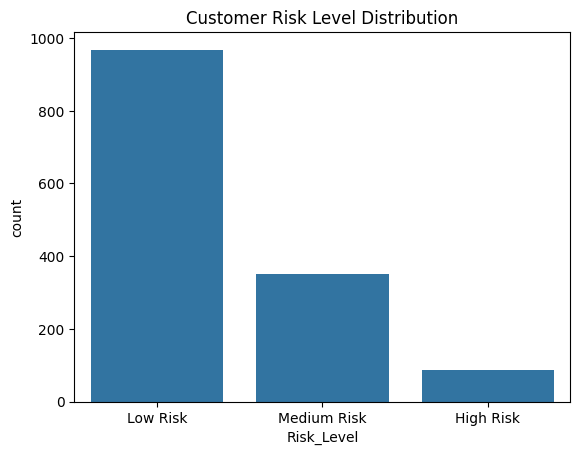

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Risk_Level', data=results)
plt.title("Customer Risk Level Distribution")
plt.show()


In [33]:
def business_action(risk):
    if risk == "High Risk":
        return "Give Discount / Call Customer"
    elif risk == "Medium Risk":
        return "Send Offer Email"
    else:
        return "No Action"

results['Action'] = results['Risk_Level'].apply(business_action)


In [34]:
results[['Actual_Churn', 'Predicted_Churn', 'Churn_Probability', 'Risk_Level', 'Action']].head(10)

,Actual_Churn,Predicted_Churn,Churn_Probability,Risk_Level,Action
974,0,0,0.025388,Low Risk,No Action
619,0,1,0.521497,Medium Risk,Send Offer Email
4289,0,0,0.005660,Low Risk,No Action
3721,1,0,0.199450,Low Risk,No Action
4533,0,0,0.102302,Low Risk,No Action
445,1,0,0.468515,Medium Risk,Send Offer Email
5898,0,0,0.020655,Low Risk,No Action
3387,0,0,0.168050,Low Risk,No Action
1346,1,1,0.642504,Medium Risk,Send Offer Email
5690,0,0,0.014326,Low Risk,No Action


In [35]:
final_df = results.copy()


In [39]:
final_df = results[
    [
        'tenure',
        'MonthlyCharges',
        'TotalCharges',
        'AvgChargePerMonth',
        'Churn_Probability',
        'Risk_Level',
        'Actual_Churn',
        'Predicted_Churn'
    ]
]


In [40]:
final_df['Risk_Level'] = final_df['Risk_Level'].astype(str)


C:\Users\dellll\AppData\Local\Temp\ipykernel_1156\2138190798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Risk_Level'] = final_df['Risk_Level'].astype(str)


In [41]:
final_df.to_csv(
    "customer_churn_risk_dashboard_data.csv",
    index=False
)
